In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import datetime as dt

In [10]:
#Download the CSV file containing the accident data from the IBM cloud

!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-13 12:13:21--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  31.8MB/s   in 2.2s   

2020-10-13 12:13:24 (31.8 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [11]:
#read the csv file into a Pandas dataframe
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


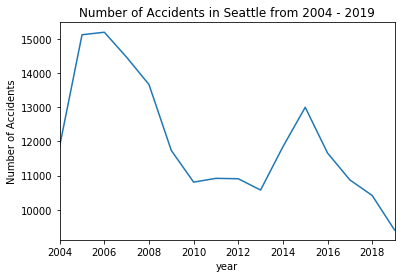

In [12]:
df_new = df
df_new['time'] = pd.to_datetime(df_new['INCDTTM'])
df_new['year'] = df_new['time'].dt.year
df_new = df_new.groupby('year', axis=0).size()
df_new = df_new[:-1]
plt.title('Number of Accidents in Seattle from 2004 - 2019')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
df_new.plot()

In [5]:
print("Severity: ", df['SEVERITYCODE'].unique())
print(df.dtypes)
print(df.shape)

Severity:  [2 1]
SEVERITYCODE               int64
X                        float64
Y                        float64
OBJECTID                   int64
INCKEY                     int64
COLDETKEY                  int64
REPORTNO                  object
STATUS                    object
ADDRTYPE                  object
INTKEY                   float64
LOCATION                  object
EXCEPTRSNCODE             object
EXCEPTRSNDESC             object
SEVERITYCODE.1             int64
SEVERITYDESC              object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE                   object
INCDTTM                   object
JUNCTIONTYPE              object
SDOT_COLCODE               int64
SDOT_COLDESC              object
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 

In [13]:
df.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC', 'INTKEY', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'COLLISIONTYPE', 'SDOT_COLCODE', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEGLANEKEY','ST_COLCODE', 'CROSSWALKKEY', 'SDOTCOLNUM', 'ST_COLDESC', 'SEVERITYCODE.1', 'STATUS', 'LOCATION','INCDATE','INCDTTM', 'HITPARKEDCAR', 'SEVERITYDESC', 'SDOT_COLDESC', 'X', 'Y', 'time', 'year'], axis=1, inplace=True)
df.set_index('OBJECTID', inplace=True)
df_new = df
df_new.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
OBJECTID,,,,,,,,,,
1,2,Intersection,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN
2,1,Block,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
3,1,Block,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN
4,1,Block,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN
5,2,Intersection,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN


In [6]:
for key, value in df_new.iteritems(): 
    print(key, " ", df_new[key].unique()) 
    print() 

SEVERITYCODE   [2 1]

ADDRTYPE   ['Intersection' 'Block' 'Alley' nan]

JUNCTIONTYPE   ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']

INATTENTIONIND   [nan 'Y']

UNDERINFL   ['N' '0' nan '1' 'Y']

WEATHER   ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']

ROADCOND   ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

LIGHTCOND   ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']

PEDROWNOTGRNT   [nan 'Y']

SPEEDING   [nan 'Y']



In [14]:
df_new["LIGHTCOND"].replace('Unknown', np.nan, inplace=True)
df_new["ROADCOND"].replace('Unknown', np.nan, inplace=True)
df_new["WEATHER"].replace('Unknown', np.nan, inplace=True)
df_new["JUNCTIONTYPE"].replace('Unknown', np.nan, inplace=True)

In [15]:
print(range(len(df_new.index)))

range(0, 194673)


In [16]:
# loop over rows, see if row has 3 or more NaN values, if yes, drop the row
count = 0
for i in (range(len(df_new.index))):
    if df_new.iloc[i].isnull().sum() >= 3:
        print(i, df_new.iloc[i].isnull().sum())
        df_new.drop(df_new.index[i], inplace = True)
        count += 1
        
    if i == 194673:
        break

print(count)
df_new.shape
#print(len(df_new.index))


0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
12 6
14 4
15 3
16 3
17 3
18 4
19 7
20 3
21 3
22 3
23 3
25 3
26 3
27 3
28 7
29 3
30 3
31 3
34 3
35 3
37 3
38 5
39 3
40 4
41 3
44 3
45 3
47 3
48 3
49 3
50 3
52 3
53 4
54 3
55 3
56 3
58 3
59 6
60 3
61 3
62 3
63 3
65 7
67 3
70 3
71 4
72 3
73 3
74 3
75 3
76 3
77 7
78 3
79 3
82 7
86 5
88 3
89 3
90 3
91 3
92 3
93 4
94 3
95 3
96 5
97 3
98 3
99 3
100 3
101 3
102 3
104 3
105 3
106 3
107 3
108 3
109 3
110 3
111 3
112 3
113 3
114 3
115 3
117 3
118 3
119 3
120 7
121 3
122 3
123 3
124 3
125 3
126 3
127 3
129 3
130 6
132 7
134 3
135 3
136 3
137 3
138 3
140 7
141 3
142 3
143 6
144 7
145 3
146 3
148 4
149 3
150 3
151 3
152 3
154 3
155 3
156 3
158 7
160 3
162 3
163 7
166 3
167 3
168 7
169 3
170 6
171 3
173 3
174 3
175 3
177 3
178 6
179 3
181 6
182 3
183 3
184 3
185 3
186 6
187 3
188 3
189 3
190 3
191 3
192 5
193 3
194 3
195 3
196 5
197 4
198 3
199 3
200 3
201 3
202 3
203 4
204 3
205 5
207 3
208 3
209 6
210 3
214 7
215 3
216 3
217 3
218 3
220 3
222 3
223 3
224

IndexError: single positional indexer is out-of-bounds

In [17]:
#df = df_new
print(df.shape)
#df.head()

(108765, 10)


In [19]:
csv_data = df_new.to_csv('newDF.csv', index = True) 
print('\nDone?') 


Done?


In [20]:
#convert Yes/No indicators to integers 
df_new["SPEEDING"].replace(np.nan, 0, inplace=True)
df_new["SPEEDING"].replace('Y', 1, inplace=True)

df_new["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df_new["PEDROWNOTGRNT"].replace('Y', 1, inplace=True)

df_new["LIGHTCOND"].replace('Daylight', 1, inplace=True)
df_new["LIGHTCOND"].replace('Dark - Street Lights On', 2, inplace=True)
df_new["LIGHTCOND"].replace('Dark - No Street Lights', 3, inplace=True)
df_new["LIGHTCOND"].replace('Dusk', 4, inplace=True)
df_new["LIGHTCOND"].replace('Dawn', 5, inplace=True)
df_new["LIGHTCOND"].replace('Dark - Street Lights Off', 6, inplace=True)
df_new["LIGHTCOND"].replace('Dark - Unknown Lighting', 7, inplace=True)

df_new["LIGHTCOND"].replace('Other', 10, inplace=True)

df_new["ROADCOND"].replace('Wet', 1, inplace=True)
df_new["ROADCOND"].replace('Dry', 2, inplace=True)
df_new["ROADCOND"].replace('Snow/Slush', 3, inplace=True)
df_new["ROADCOND"].replace('Ice', 4, inplace=True)
df_new["ROADCOND"].replace('Sand/Mud/Dirt', 5, inplace=True)
df_new["ROADCOND"].replace('Standing Water', 6, inplace=True)
df_new["ROADCOND"].replace('Oil', 7, inplace=True)

df_new["ROADCOND"].replace('Other', 10, inplace=True)

df_new["WEATHER"].replace('Overcast', 1, inplace=True)
df_new["WEATHER"].replace('Raining', 2, inplace=True)
df_new["WEATHER"].replace('Clear', 3, inplace=True)
df_new["WEATHER"].replace('Snowing', 4, inplace=True)
df_new["WEATHER"].replace('Fog/Smog/Smoke', 5, inplace=True)
df_new["WEATHER"].replace('Sleet/Hail/Freezing Rain', 6, inplace=True)
df_new["WEATHER"].replace('Blowing Sand/Dirt', 7, inplace=True)
df_new["WEATHER"].replace('Severe Crosswind', 8, inplace=True)
df_new["WEATHER"].replace('Partly Cloudy', 9, inplace=True)

df_new["WEATHER"].replace('Other', 10, inplace=True)

df_new["UNDERINFL"].replace('N', 0, inplace=True)
df_new["UNDERINFL"].replace('Y', 1, inplace=True)

df_new["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df_new["INATTENTIONIND"].replace('Y', 1, inplace=True)

df_new["JUNCTIONTYPE"].replace('At Intersection (intersection related)', 1, inplace=True)
df_new["JUNCTIONTYPE"].replace('Mid-Block (not related to intersection)', 2, inplace=True)
df_new["JUNCTIONTYPE"].replace('Driveway Junction', 3, inplace=True)
df_new["JUNCTIONTYPE"].replace('Mid-Block (but intersection related)', 4, inplace=True)
df_new["JUNCTIONTYPE"].replace('At Intersection (but not related to intersection)', 5, inplace=True)
df_new["JUNCTIONTYPE"].replace('Ramp Junction', 6, inplace=True)


df_new["ADDRTYPE"].replace('Intersection', 1, inplace=True)
df_new["ADDRTYPE"].replace('Block', 2, inplace=True)
df_new["ADDRTYPE"].replace('Alley', 3, inplace=True)

df_new.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
OBJECTID,,,,,,,,,,
2,1,2.0,2.0,0,0,2.0,1.0,2.0,0,0
4,1,2.0,2.0,0,0,3.0,2.0,1.0,0,0
6,1,1.0,1.0,0,0,3.0,2.0,1.0,0,0
9,2,1.0,1.0,0,0,3.0,2.0,1.0,0,0
12,2,1.0,1.0,0,0,3.0,2.0,1.0,0,0


In [21]:
df_new.dtypes

SEVERITYCODE        int64
ADDRTYPE          float64
JUNCTIONTYPE      float64
INATTENTIONIND      int64
UNDERINFL          object
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
PEDROWNOTGRNT       int64
SPEEDING            int64
dtype: object

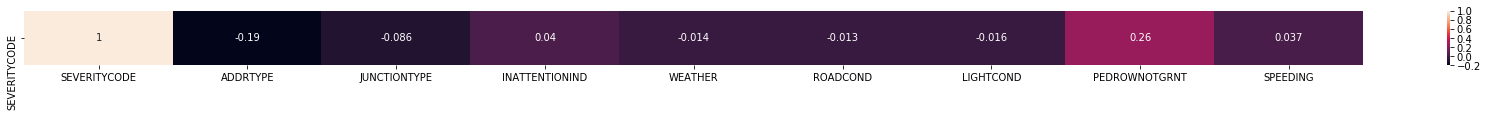

In [22]:
df_corel = df_new.corr()
df_corel = df_corel[:1]
df_corel.head()

plt.figure(figsize=(30, 1))
heatmap = sns.heatmap(df_corel, annot=True)
plt.show()

In [23]:
df_corel.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
SEVERITYCODE,1.0,-0.194437,-0.085876,0.039949,-0.013751,-0.013433,-0.015912,0.259581,0.03662


In [24]:
for column in df_new: 
    if df_new[column].dtypes != 'float64':
        df_new[column] = df_new[column].astype(float)
        
df_new.dtypes

SEVERITYCODE      float64
ADDRTYPE          float64
JUNCTIONTYPE      float64
INATTENTIONIND    float64
UNDERINFL         float64
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
PEDROWNOTGRNT     float64
SPEEDING          float64
dtype: object

In [25]:
i = 0
for column in df_new: 
    #print(df_new[column].sum(), df_new['SEVERITYCODE'])
    pearson_coef, p_value = stats.pearsonr(df_new[column], df_new['SEVERITYCODE'])
  #  print(column, " PC ", pearson_coef, " PV ", p_value)  
    print(p_value)
    i += 1


0.0
1.0
1.0
1.1413504580258658e-39
1.0
1.0
1.0
1.0
0.0
1.328416302642816e-33


In [26]:
df_new.shape

(108765, 10)

In [27]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    

SEVERITYCODE
False    108765
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    107919
True        846
Name: ADDRTYPE, dtype: int64

JUNCTIONTYPE
False    105973
True       2792
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    108765
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    106721
True       2044
Name: UNDERINFL, dtype: int64

WEATHER
False    99910
True      8855
Name: WEATHER, dtype: int64

ROADCOND
False    99953
True      8812
Name: ROADCOND, dtype: int64

LIGHTCOND
False    100584
True       8181
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    108765
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    108765
Name: SPEEDING, dtype: int64



In [28]:
#replacing NaN values with the most frequent value of the column
df_new["ADDRTYPE"].replace(np.nan, 2, inplace=True)
df_new["JUNCTIONTYPE"].replace(np.nan, 2, inplace=True)
df_new["UNDERINFL"].replace(np.nan, 0, inplace=True)
df_new["WEATHER"].replace(np.nan, 3, inplace=True)
df_new["ROADCOND"].replace(np.nan, 2, inplace=True)
df_new["LIGHTCOND"].replace(np.nan, 1, inplace=True)

In [29]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    

SEVERITYCODE
False    108765
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    108765
Name: ADDRTYPE, dtype: int64

JUNCTIONTYPE
False    108765
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    108765
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    108765
Name: UNDERINFL, dtype: int64

WEATHER
False    108765
Name: WEATHER, dtype: int64

ROADCOND
False    108765
Name: ROADCOND, dtype: int64

LIGHTCOND
False    108765
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    108765
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    108765
Name: SPEEDING, dtype: int64



## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT','SPEEDING']].values
X[0:5]

array([[2., 2., 0., 0., 2., 1., 2., 0., 0.],
       [2., 2., 0., 0., 3., 2., 1., 0., 0.],
       [1., 1., 0., 0., 3., 2., 1., 0., 0.],
       [1., 1., 0., 0., 3., 2., 1., 0., 0.],
       [1., 1., 0., 0., 3., 2., 1., 0., 0.]])

In [32]:
y = df["SEVERITYCODE"]
y[0:5]

OBJECTID
2     1.0
4     1.0
6     1.0
9     2.0
12    2.0
Name: SEVERITYCODE, dtype: float64

In [33]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)


(76135, 9)
(76135,)
(32630, 9)
(32630,)


In [34]:
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
carTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
carTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
predTree = carTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[1. 1. 1. 1. 1.]
OBJECTID
20933     2.0
146278    1.0
4880      1.0
147874    1.0
10638     1.0
Name: SEVERITYCODE, dtype: float64


In [37]:
print("The DecisionTrees's Accuracy is ", metrics.accuracy_score(y_testset, predTree)*100, "%")

The DecisionTrees's Accuracy is  70.6251915415262 %


## Logistic Regression 

In [50]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, itert
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [39]:
XX = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT','SPEEDING']].values
XX[0:5]

array([[2., 2., 0., 0., 2., 1., 2., 0., 0.],
       [2., 2., 0., 0., 3., 2., 1., 0., 0.],
       [1., 1., 0., 0., 3., 2., 1., 0., 0.],
       [1., 1., 0., 0., 3., 2., 1., 0., 0.],
       [1., 1., 0., 0., 3., 2., 1., 0., 0.]])

In [40]:
yy = df["SEVERITYCODE"]
yy[0:5]

OBJECTID
2     1.0
4     1.0
6     1.0
9     2.0
12    2.0
Name: SEVERITYCODE, dtype: float64

In [41]:
#Normalise the dataset
XX = preprocessing.StandardScaler().fit(X).transform(X)
XX[0:5]

array([[ 0.68363364, -0.03184356, -0.60303686, -0.22711402, -0.6434484 ,
        -1.40794403,  0.60823208, -0.2094997 , -0.30372416],
       [ 0.68363364, -0.03184356, -0.60303686, -0.22711402,  0.48539114,
         0.40619415, -0.50127505, -0.2094997 , -0.30372416],
       [-1.42382661, -1.03342382, -0.60303686, -0.22711402,  0.48539114,
         0.40619415, -0.50127505, -0.2094997 , -0.30372416],
       [-1.42382661, -1.03342382, -0.60303686, -0.22711402,  0.48539114,
         0.40619415, -0.50127505, -0.2094997 , -0.30372416],
       [-1.42382661, -1.03342382, -0.60303686, -0.22711402,  0.48539114,
         0.40619415, -0.50127505, -0.2094997 , -0.30372416]])

In [42]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=4)
print ('Train set:', XX_train.shape,  yy_train.shape)
print ('Test set:', XX_test.shape,  yy_test.shape)

Train set: (87012, 9) (87012,)
Test set: (21753, 9) (21753,)


In [43]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(XX_train,yy_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
yhat = LR.predict(XX_test)
yhat

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
yhat_prob = LR.predict_proba(XX_test)
yhat_prob

array([[0.64028829, 0.35971171],
       [0.64028829, 0.35971171],
       [0.6319564 , 0.3680436 ],
       ...,
       [0.52013152, 0.47986848],
       [0.64260249, 0.35739751],
       [0.72095587, 0.27904413]])

### Jaccard Index

In [47]:
from sklearn.metrics import jaccard_similarity_score

In [48]:
jaccard_similarity_score(yy_test, yhat)

0.7091895370753459

In [51]:
print (classification_report(yy_test, yhat))

              precision    recall  f1-score   support

         1.0       0.70      0.98      0.82     14733
         2.0       0.78      0.14      0.23      7020

   micro avg       0.71      0.71      0.71     21753
   macro avg       0.74      0.56      0.53     21753
weighted avg       0.73      0.71      0.63     21753



In [52]:
log_loss(y_test, yhat_prob)

NameError: name 'log_loss' is not defined